<a href="https://colab.research.google.com/github/Romeela/Bank-Marketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Marketing Dataset
Predicting Term Deposit Suscriptions

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
data=pd.read_csv("/content/bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [2]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


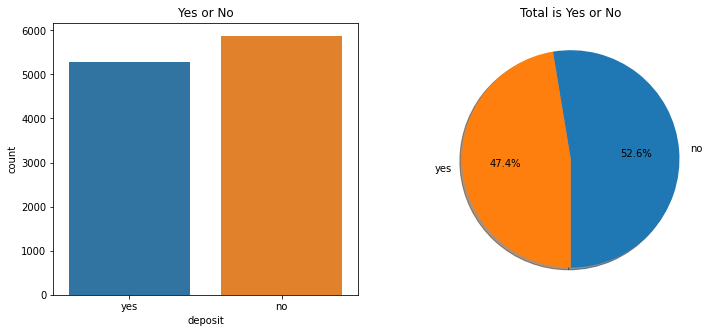

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=data)
plt.title("Yes or No")
plt.subplot(1,2,2)
labels =data['deposit'].value_counts(sort = True).index
sizes = data['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total is Yes or No',size = 12)
plt.show()


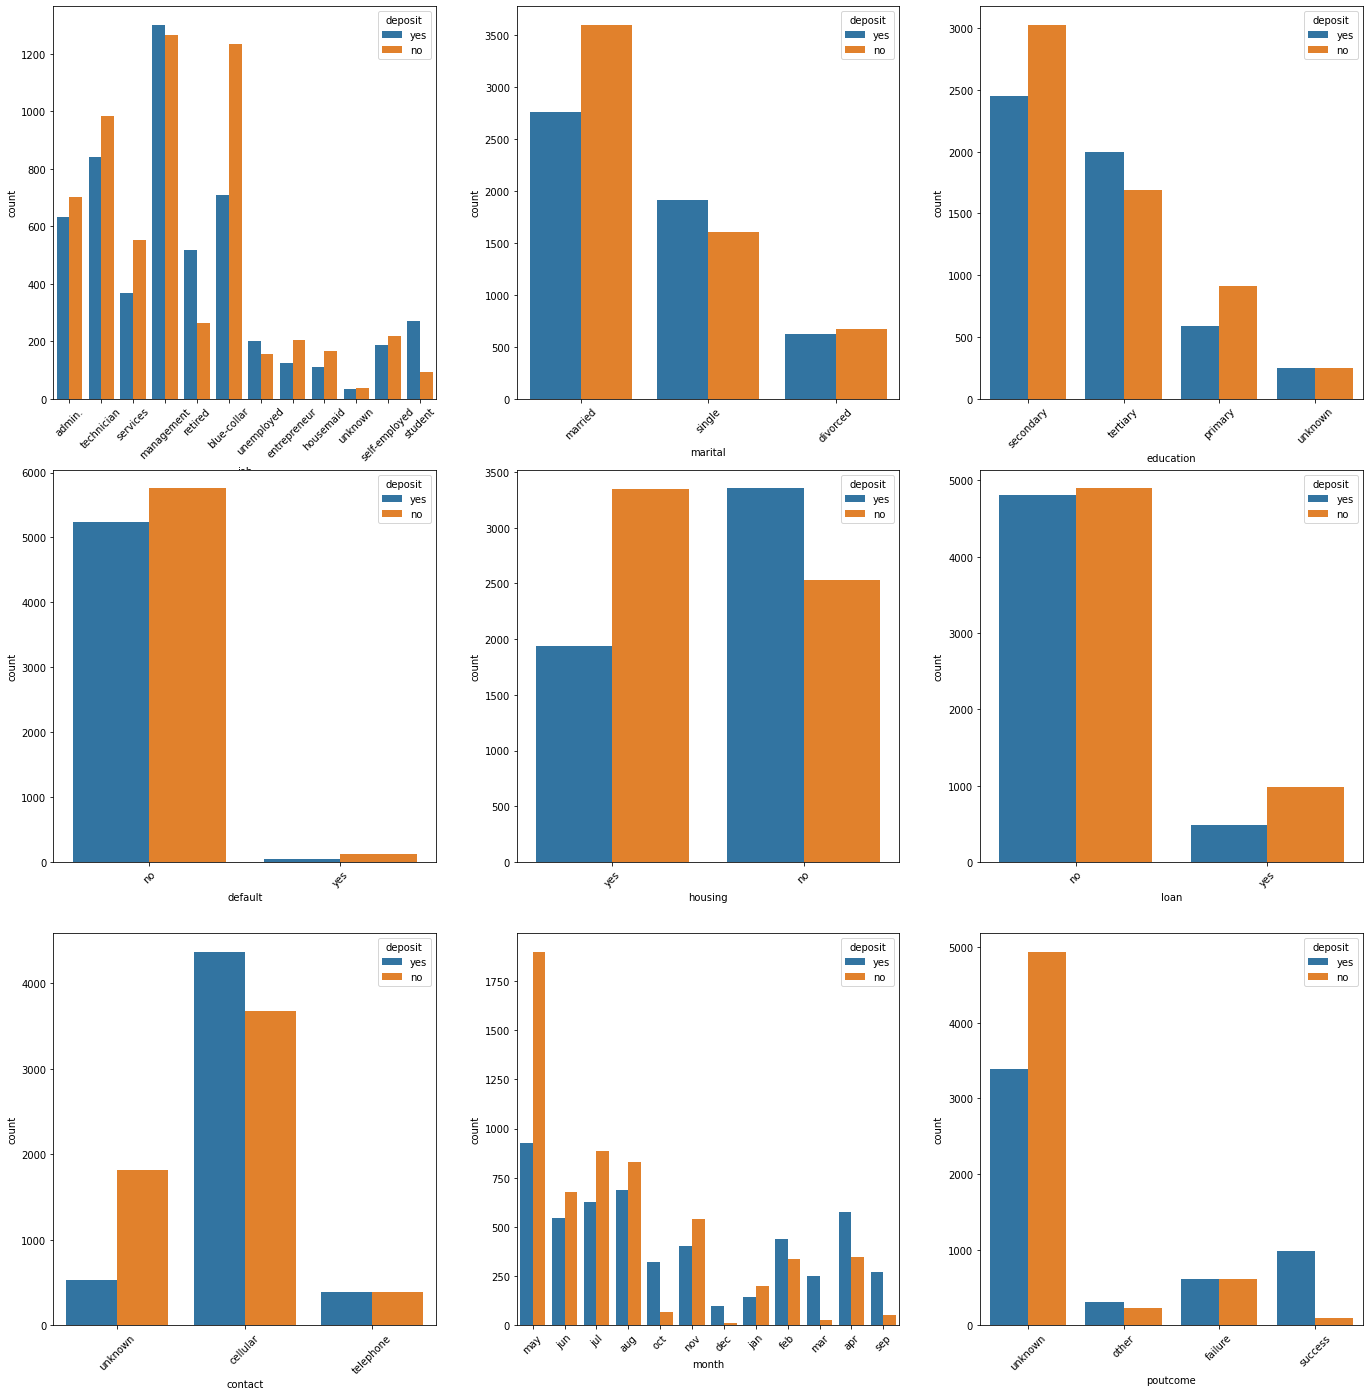

In [8]:
colonnes_obj=data.select_dtypes('O').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_obj, axes.flatten()):
    sns.countplot(x=col,data=data, hue='deposit', ax=ax)
    ax.tick_params(axis='x', rotation=45)

plt.show()

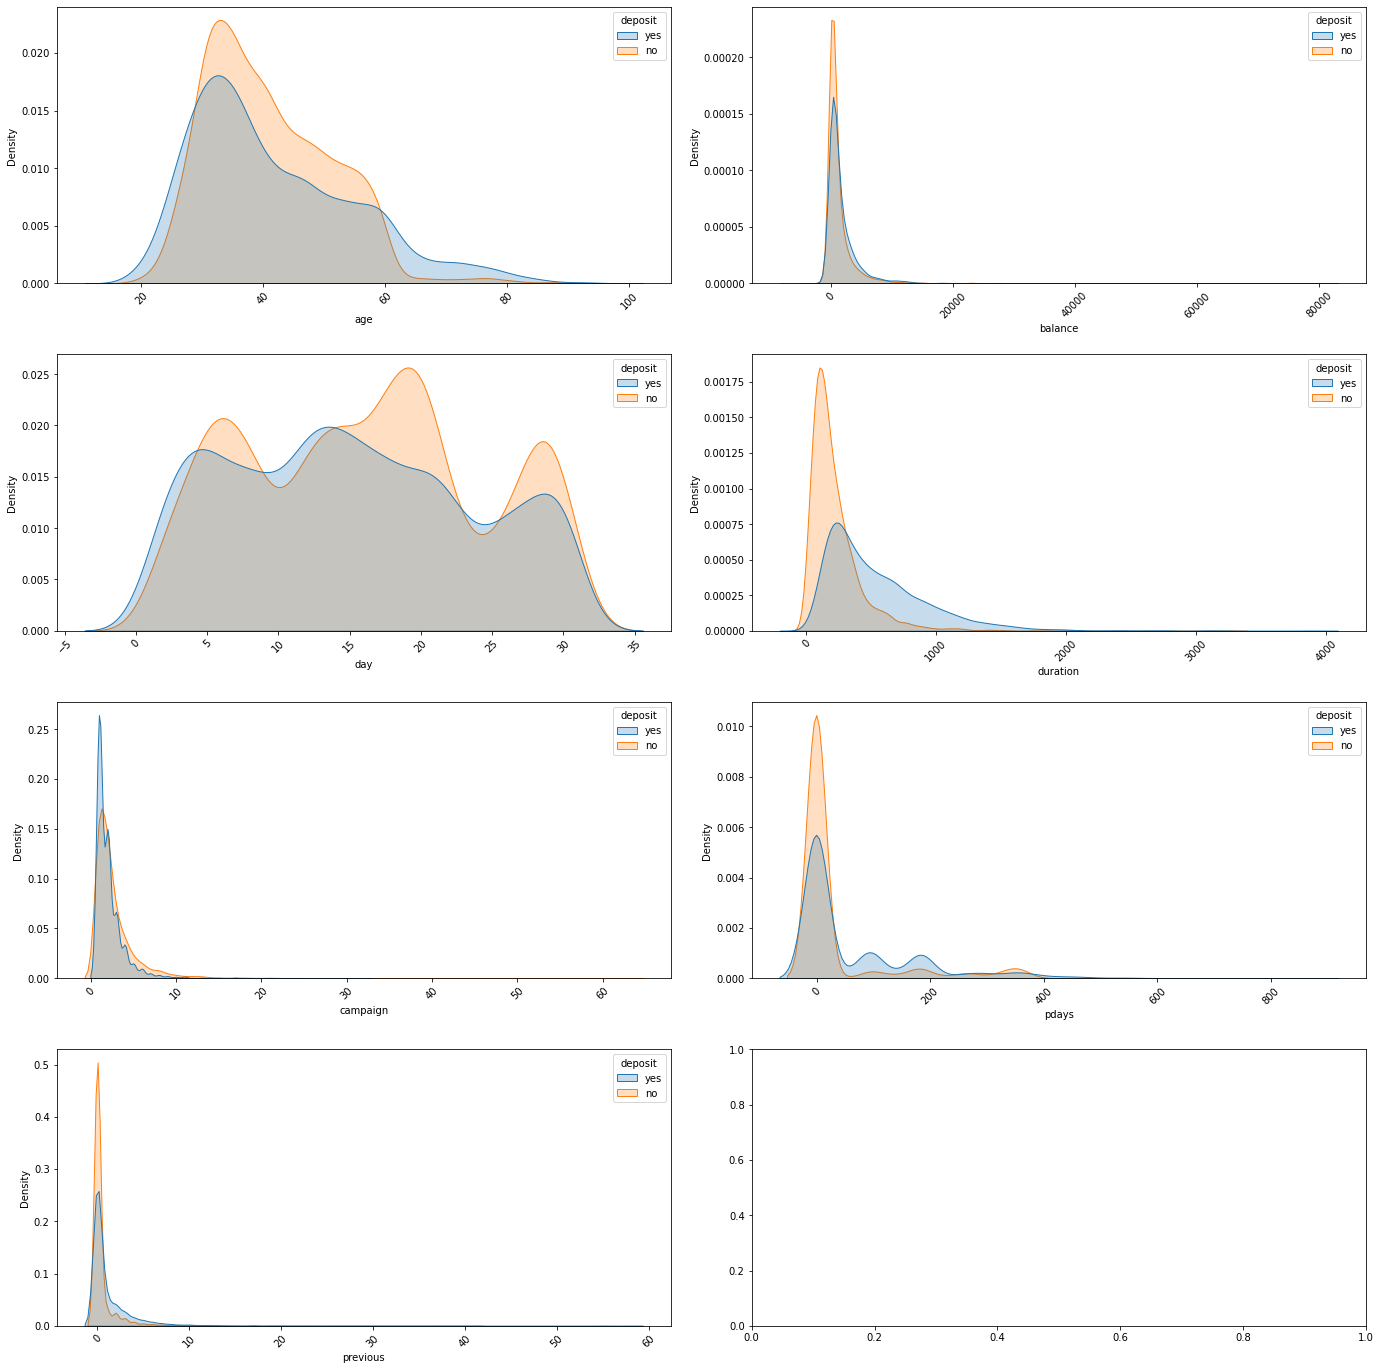

In [9]:
colonnes_int=data.select_dtypes('int').columns
fig, axes = plt.subplots(4,2, figsize=(20, 20))
fig.tight_layout(pad=5.0)
for col, ax in zip(colonnes_int, axes.flatten()):
    sns.kdeplot(x=col,data=data, hue='deposit', ax=ax, fill=True)
    ax.tick_params(axis='x', rotation=45)

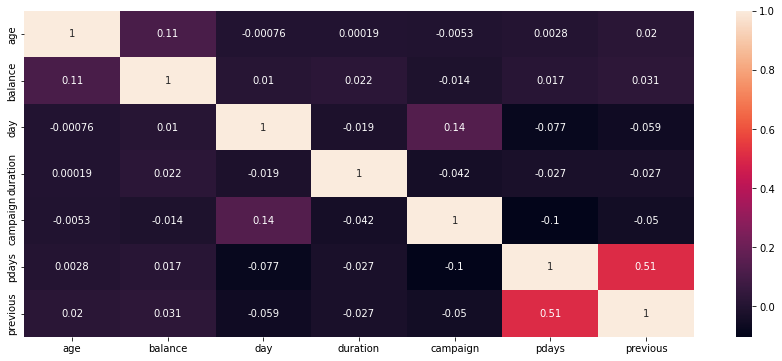

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [11]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores( data.loc[:, data.dtypes==int], data['deposit'], 'auto')
mi_scores[::3]

duration    0.104564
campaign    0.012355
day         0.005152
Name: MI Scores, dtype: float64

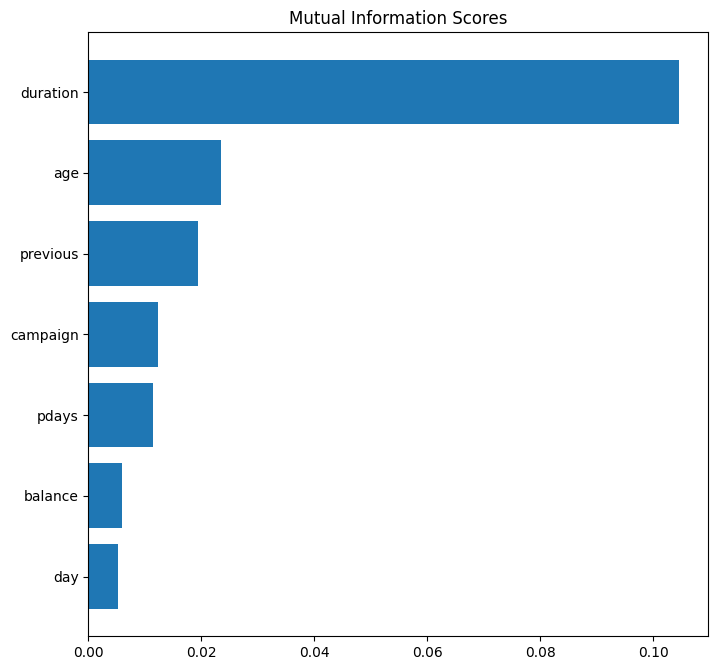

In [12]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 8))
plot_mi_scores(mi_scores)

In [13]:
data.drop('previous',axis=1,inplace=True)

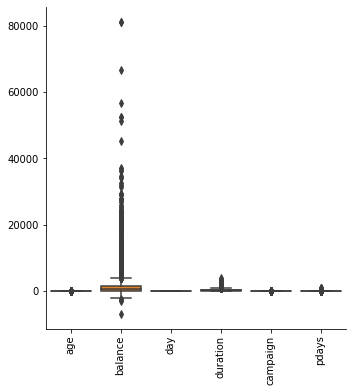

In [14]:
sns.catplot(data=data,kind='box')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


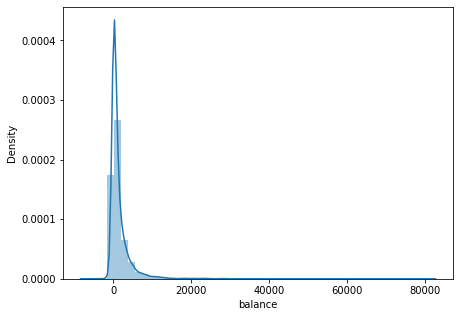

In [15]:
plt.figure(figsize=(7,5))
sns.distplot(data['balance'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


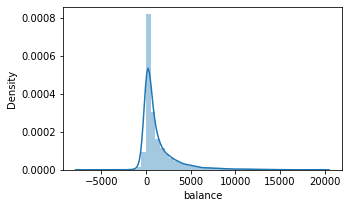

In [16]:
i=data['balance'][data['balance']>20000].index
data.drop(i,inplace=True)
plt.figure(figsize=(5,3))
sns.distplot(data['balance'])
plt.show()

In [17]:
data['deposit'] = data['deposit'].map({'no': 0, 'yes': 1})

In [18]:
dict_mois = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
             'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
data['month'] = data['month'].map(dict_mois)

In [19]:
#default :
data.default.replace({'no' : 0, 'yes' : 1}, inplace = True)
#housing :
data.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)
#loan :
data.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)

In [20]:
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)

In [21]:
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)

In [22]:
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)

In [23]:
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)

In [24]:
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)

In [25]:
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)

In [26]:
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

In [27]:
data.dtypes

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
deposit                int64
marital_married        uint8
marital_single         uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
contact_cellular       uint8
contact_telephone      uint8
poutcome_failure       uint8
poutcome_other         uint8
poutcome_success       uint8
dtype: object

In [28]:
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,job_technician,job_unemployed,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,59,0,2343,1,0,5,5,1042,1,0,...,0,0,0,1,0,0,0,0,0,0
1,56,0,45,0,0,5,5,1467,1,0,...,0,0,0,1,0,0,0,0,0,0
2,41,0,1270,1,0,5,5,1389,1,0,...,1,0,0,1,0,0,0,0,0,0
3,55,0,2476,1,0,5,5,579,1,0,...,0,0,0,1,0,0,0,0,0,0
4,54,0,184,0,0,5,5,673,2,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,4,257,1,0,...,0,0,1,0,0,1,0,0,0,0
11158,39,0,733,0,0,16,6,83,4,0,...,0,0,0,1,0,0,0,0,0,0
11159,32,0,29,0,0,19,8,156,2,0,...,1,0,0,1,0,1,0,0,0,0
11160,43,0,0,0,1,8,5,9,2,1,...,1,0,0,1,0,1,0,1,0,0


In [29]:
data.to_csv('datacode.csv', index=False)

In [30]:
X = data.drop('deposit', axis=1)
Y = data['deposit']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 32)

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.neural_network import MLPClassifier #Multilayer perceptron
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import svm

In [36]:
for i in range(2,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s,y_train)
    Y_pred = knn.predict(X_test_s)
    Y_test_pred =  knn.predict(X_test_s)
    knn_test_accuracy = metrics.accuracy_score(y_test,Y_pred)
    knn_train_accuracy = knn.score(X_train_s,y_train)
     
    
    print(f"For K={i} test accuracy is {knn_test_accuracy*100:.2f}%".format(i,knn_test_accuracy))
    print(f"For K={i} train accuracy is {knn_train_accuracy*100:.2f}%".format(i,knn_train_accuracy))
    
    print()

For K=2 test accuracy is 71.45%
For K=2 train accuracy is 84.86%

For K=3 test accuracy is 75.60%
For K=3 train accuracy is 86.17%

For K=4 test accuracy is 74.47%
For K=4 train accuracy is 81.48%

For K=5 test accuracy is 77.44%
For K=5 train accuracy is 82.52%

For K=6 test accuracy is 75.91%
For K=6 train accuracy is 80.21%

For K=7 test accuracy is 77.13%
For K=7 train accuracy is 81.17%

For K=8 test accuracy is 76.09%
For K=8 train accuracy is 79.58%

For K=9 test accuracy is 77.40%
For K=9 train accuracy is 79.47%

For K=10 test accuracy is 75.91%
For K=10 train accuracy is 78.20%

For K=11 test accuracy is 76.50%
For K=11 train accuracy is 78.78%

For K=12 test accuracy is 75.55%
For K=12 train accuracy is 77.85%

For K=13 test accuracy is 76.14%
For K=13 train accuracy is 78.67%

For K=14 test accuracy is 75.46%
For K=14 train accuracy is 77.56%

For K=15 test accuracy is 75.87%
For K=15 train accuracy is 78.31%

For K=16 test accuracy is 75.46%
For K=16 train accuracy is 77.3

In [37]:
knn5= KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_s,y_train)
knn5_train_pred = knn5.predict(X_train_s)
knn5_test_pred =  knn5.predict(X_test_s)
print("Report of learning set: \n",classification_report(y_train,knn5_train_pred))
print("The test set report: \n",classification_report(y_test,knn5_test_pred))

Report of learning set: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      4670
           1       0.84      0.79      0.81      4214

    accuracy                           0.83      8884
   macro avg       0.83      0.82      0.82      8884
weighted avg       0.83      0.83      0.82      8884

The test set report: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1175
           1       0.77      0.74      0.75      1046

    accuracy                           0.77      2221
   macro avg       0.77      0.77      0.77      2221
weighted avg       0.77      0.77      0.77      2221



In [38]:
report_knn5_test =classification_report(y_test,knn5_test_pred, output_dict=True )
report_knn5_train =classification_report(y_train,knn5_train_pred, output_dict=True )

In [43]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_s, y_train)
dtc_test_pred = dtc.predict(X_test_s)
dtc_train_pred=dtc.predict(X_train_s)
print("Predicted Value:", dtc_test_pred[:10])
print("Actual Value:   ", y_test[:10].to_numpy())

Predicted Value: [0 0 0 1 0 1 0 1 1 1]
Actual Value:    [0 0 0 1 1 0 1 1 1 1]


In [44]:
print("The ratio of the learning set: \n", classification_report(y_train,dtc_train_pred))
print("The test set report: \n", classification_report(y_test,dtc_test_pred))

The ratio of the learning set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4670
           1       1.00      1.00      1.00      4214

    accuracy                           1.00      8884
   macro avg       1.00      1.00      1.00      8884
weighted avg       1.00      1.00      1.00      8884

The test set report: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1175
           1       0.76      0.75      0.75      1046

    accuracy                           0.77      2221
   macro avg       0.77      0.77      0.77      2221
weighted avg       0.77      0.77      0.77      2221



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train_s, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train_s)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test_s)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8709530702517622
Train AUC ROC Score for GS:  0.8737143141704667
Test AUC ROC Score for GS:  0.8237280826654734


In [46]:
clf2 = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
clf2.fit(X_train_s, y_train)
clf2_train_pred = clf2.predict(X_train_s)
clf2_test_pred =  clf2.predict(X_test_s)
print("The ratio of the learning set: \n",classification_report(y_train,clf2_train_pred))
print("The report of the test set: \n",classification_report(y_test,clf2_test_pred))

The ratio of the learning set: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4670
           1       0.83      0.85      0.84      4214

    accuracy                           0.85      8884
   macro avg       0.85      0.85      0.85      8884
weighted avg       0.85      0.85      0.85      8884

The report of the test set: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1175
           1       0.82      0.85      0.83      1046

    accuracy                           0.84      2221
   macro avg       0.84      0.84      0.84      2221
weighted avg       0.84      0.84      0.84      2221

